### **Chapter03. 신경망 (Neural Network)**

#### **3.1 신경망**

* 신경망은 데이터로부터 적절한 매개변수의 값을 학습하는 성질 있음
* 퍼셉트론에서 사람이 수동적으로 가중치를 설정하던 문제를 해결

* ***신경망 구조***

<img width="35%" src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FQGE7p%2FbtqVvOYeAIt%2F2EHFQj56d0l2tHK3JLk3k0%2Fimg.png">


####**3.2 활성화 함수**

***활성화 함수 구조***

$x = b + w_{1}x_{1} + w_{2}x_{2}$

$h(x) =\begin{cases}0 & (x \leq  0)  \\1 & (x >  0) \end{cases} $

$y = h(a)$

* ***활성화 함수 (Activation Function)*** : 입력 신호의 총합을 출력 신호로 변환하는 함수/입력 신호의 총합이 활성화를 일으키는지 정하는 역할

In [ ]:
## 단순 퍼셉트론 : 단층 네트워크에서 계단 함수(임계값을 경계로 출력이 바뀌는 함수)를 활성화 함수로 사용한 모델
## 다층 퍼셉트론 : 신경망 (여러 층으로 구성되고, 시그모이드 함수 등 매끈한 활성화 함수를 사용하는 네트워크)

##### ***3.2.1 계단 함수 (Step Function)***

* 임계값을 경계로 출력이 바뀌는 함수 ⟹ 선형 함수

* 퍼셉트론과 신경망의 차이점
  * 사용하는 활성화 함수 차이
  * 계단 함수 vs 다른 활성화 함수

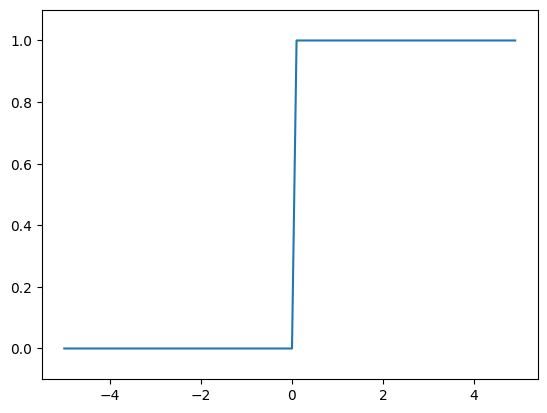

In [ ]:
# 계단 함수 구현
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
  return np.array(x > 0, dtype=int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

##### ***3.2.2 시그모이드 함수 (Sigmoid Function)***

$h(x) = \frac{1}{1 + exp(-x)} = \frac{1}{1 + e^{-x}} $

$exp(-x) =  e^{-x} $

* s자 모양 함수 ⟹ 비선형 함수

In [ ]:
## 시그모이드 함수 구현
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1 /  (1 + np.exp(-x))

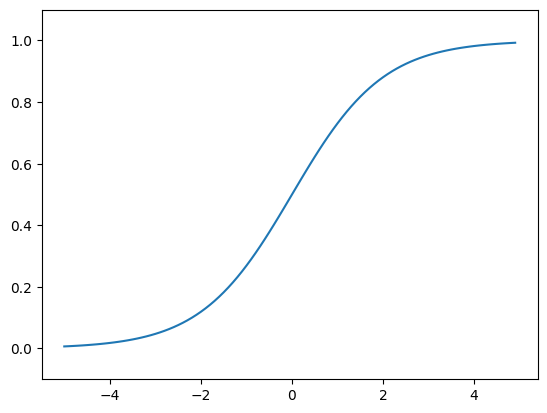

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

##### ***3.3.3 ReLU 함수 (Rectified Linear Unit : 렐루)***

$h(x) =\begin{cases}x & (x >  0)  \\0 & (x \leq  0) \end{cases} $

* 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하면 0 출력 ⟹ 비선형 함수

In [ ]:
## ReLU 함수 구현
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
  return np.maximum(0, x)

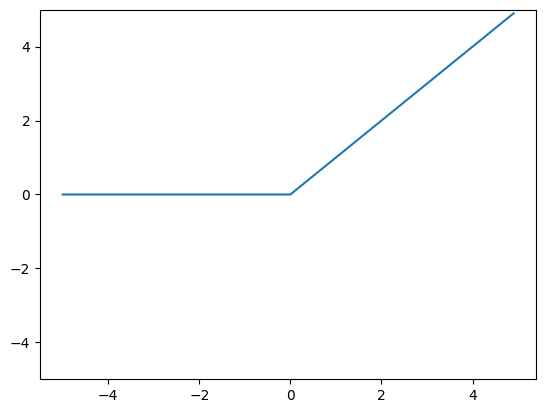

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.ylim(-5.0, 5.0)
plt.show()

####**3.3 다차원 배열의 계산**

In [ ]:
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [ ]:
# 배열의 차원 수 확인
np.ndim(a)

2

In [ ]:
# 배열의 형상 튜플로 확인
a.shape

(3, 4)

In [ ]:
# 행렬의 스칼라곱
a = np.array([[1, 2], [3, 4], [5, 6]])
b = np.array([[5, 6], [7, 8]])
np.dot(a, b)

array([[19, 22],
       [43, 50],
       [67, 78]])

#### **3.4 신경망 구현**

In [ ]:
## 각 층의 신호 전달 구현
# 0층에서 1층 신호 전달
x = np.array([1.0, 0.5])
w1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
b1 = np.array([0.1, 0.2, 0.3])

a1 = np.dot(x, w1) + b1
a1

array([0.3, 0.7, 1.1])

In [ ]:
z1 = sigmoid(a1)
z1

array([0.57444252, 0.66818777, 0.75026011])

In [ ]:
# 1층에서 2층 신호 전달
w2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
b2 = np.array([0.1, 0.2])

a2 = np.dot(z1, w2) + b2
z2 = sigmoid(a2)
z2

array([0.62624937, 0.7710107 ])

In [ ]:
## 향등 함수 : 입력을 그대로 출력하는 함수 ⟹ 출력층의 활성화 함수는 풀고자 하는 문제의 성질에 맞게 설정
def identity_Function(x):
  return x

# 2층에서 출력층으로 신호 전달
w3 = np.array([[0.1, 0.3], [0.2, 0.4]])
b3 = np.array([0.1, 0.2])

a3 = np.dot(z2, w3) + b3
y = identity_Function(a3)
y

array([0.31682708, 0.69627909])

In [ ]:
## 3층 신경망 순방향 구현 정리
# 가중치와 편향 초기화하고 저장
def init_network():
  network = {}
  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network['b1'] = np.array([0.1, 0.2, 0.3])
  network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network['b2'] = np.array([0.1, 0.2])
  network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network['b3'] = np.array([0.1, 0.2])

  return network

# 입력 신호 출력 신호로 변환
def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = identity_Function(a3)

  return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


#### **3.5 출력층 설계**

* 기계 학습 문제는 크게 분류와 회귀로 나눔
* ***분류 (Classfication)*** : 데이터가 어느 클래스에 속하느냐는 문제 ⟹ 소프트맥스 함수 사용
* ***회귀 (Regression)*** : 입력 데이터에서 연속적인 수치를 예측하는 문제 ⟹ 향등 함수 사용



##### ***3.5.1 소프트맥스 함수 (Softmax Function)***

$y_{k} = \frac{exp(a_{k})}{\displaystyle\sum_{i=1}^{n} exp(a_{i})}$

* 분자는 k번째 입력 신호의 지수 함수로, 분모는 모든 입력 신호의 지수 함수의 합으로 이루어진 함수
* 모든 입력 신호로부터 화살표를 받음 (출력층의 각 뉴런이 모든 입력 신호에서 영향을 받기 떄문)

* 소프트맥스 함수의 출력 범위는 0~1.0 사이의 실수
* 소프트맥스 함수의 출력 총합은 1이다. 따라서 소프트맥스 함수의 출력을 ***확률***로 해석 가능

In [ ]:
a = np.array([0.3, 2.9, 4.0])

# 지수 함수
exp_a = np.exp(a)
print(exp_a)

# 지수 함수의 합
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [ ]:
# 소프트맥스 함수 구현
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

In [ ]:
# 소프트맥스 함수 오버플로 문제 해결
def sofmax(a):
  C = np.Max(a)           # 오버플로를 막을 목적으로는 입력 신호 중 최댓값 이용
  exp_a = np.exp(a - C) # overflow 대책
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

In [ ]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
np.sum(y)

[0.01821127 0.24519181 0.73659691]


1.0

####**3.6 손글씨 숫자 인식**

[MNIST 모델 참고](https://my-brain.tistory.com/4)

* 기계학습의 문제 풀이는 ***학습***과 ***추론*** 단계를 거침
* ***학습 단계*** : 훈련 데이터를 사용하여 가중치 및 편향 등 매개변수를 학습
* ***추론 단계*** : 학습한 매개변수를 사용하여 입력 데이터를 분류

In [ ]:
## 신경망의 순전파 (Forward Propagation) : 신경망의 추론 과정
# MNIST 데이터셋 : 손글씨 숫자 이미지 집합
from keras.datasets import mnist

(x_train, t_train), (x_test, t_test) = mnist.load_data()

img = x_train[0]
label = t_train[0]
print(label)
print(img.shape)

11490434/11490434 [==============================] - 0s 0us/step
5
(28, 28)


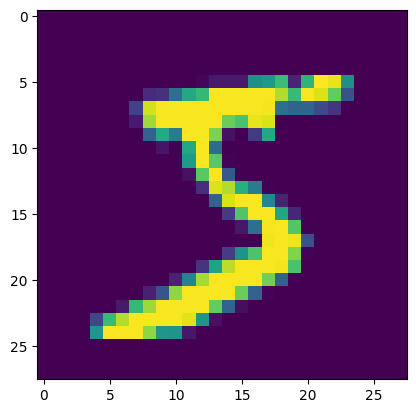

In [ ]:
from matplotlib.pyplot import imshow
#imshow(img.reshape(28, 28))
imshow(x_train[0])

In [ ]:
## 신경망의 추론 처리 ⟹ 입력층 뉴런 : 784개 (28X28) / 출력층 뉴런 : 10개
from keras.datasets import mnist
import numpy as np
import pickle

def get_data():
  (x_train, t_train), (x_test, t_test) = mnist.load_data()
  return x_test, t_test

# pkl 파일 불러오기 : 학습된 가중치 매개변수 저장 파일
def init_network():
  with open("/content/sample_weight.pkl", "rb") as f:
            network = pickle.load(f)

  return network

# 각 레이블의 확률을 넘파이 배열로 반환
def predict(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = softmax(a3)

  return y

In [ ]:
x, t = get_data()
x = x.reshape(-1, 28**2)
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
  y = predict(network, x[i])
  p = np.argmax(y)  # 확률이 가장 높은 원소의 인덱스

  if p == t[i]:
    accuracy_cnt += 1

print("Accuracy : " + str(float(accuracy_cnt) / len(x)))

<ipython-input-7-40020ef692f8>:6: RuntimeWarning: overflow encountered in exp
  return 1 /  (1 + np.exp(-x))


Accuracy : 0.9207


In [ ]:
## 정규화 (Normalization) : 데이터를 특정 범위로 변환하는 처리
## 전처리 (Pre-processing) : 신경망의 입력 데이터에 특정 변환을 가하는 것
## 데이터 백색화 : 전체 데이터를 균일하게 분포시키는 작업

10000

***배치 (Batch)***

* 입력 데이터를 하나로 묶는 작업
* 컴퓨터에서는 큰 배열을 한 번에 계산하는 것이 작은 배열을 여러 번 계산하는 것 보다 효율적

In [ ]:
x, t = get_data()
x = x.reshape(-1, 28**2)
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
  x_batch = x[i:i+batch_size]
  y_batch = predict(network, x_batch)
  p = np.argmax(y_batch, axis=1)
  accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy : " + str(float(accuracy_cnt) / len(x)))

Accuracy : 0.9207


<ipython-input-7-40020ef692f8>:6: RuntimeWarning: overflow encountered in exp
  return 1 /  (1 + np.exp(-x))
